# Import libraries and data frames

In [1]:
# import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
# Import data frames
path = r'G:\Career Foundery\CFundry-6\2 Data set'
energy_consump = pd.read_pickle(os.path.join(path, 'Modified', 'energy_consumption.pkl'))
elect_prod = pd.read_pickle(os.path.join(path, 'Modified', 'elect_production.pkl'))
euro_gdp = pd.read_pickle(os.path.join(path, 'Modified', 'euro_gdp.pkl'))
euro_pop = pd.read_pickle(os.path.join(path, 'Modified', 'euro_population.pkl'))
euro_area = pd.read_pickle(os.path.join(path, 'Modified', 'euro_area.pkl'))

In [52]:
energy_consump.head()

,country,time-period,sector,energy-type,value(KTOE)
0,Albania,2009,households,Solid fossil fuels,0.000
1,Albania,2010,households,Solid fossil fuels,0.000
2,Albania,2011,households,Solid fossil fuels,0.000
3,Albania,2012,households,Solid fossil fuels,0.235
4,Albania,2013,households,Solid fossil fuels,0.235


In [53]:
elect_prod.head()

,country,time-period,fuel-type,value(GWH)
0,Albania,2018-01,Coal and manufactured gases,0.0
1,Albania,2018-02,Coal and manufactured gases,0.0
2,Albania,2018-03,Coal and manufactured gases,0.0
3,Albania,2018-04,Coal and manufactured gases,0.0
4,Albania,2018-05,Coal and manufactured gases,0.0


In [54]:
euro_gdp.head()

,country,time-period,GDP(mm-euro)
0,Austria,1995-Q1,59780.9
1,Austria,1995-Q2,60233.1
2,Austria,1995-Q3,60432.1
3,Austria,1995-Q4,61000.1
4,Austria,1996-Q1,61194.2


In [124]:
euro_pop.head()

,country,time-period,population
0,Andorra,1986,44593.0
1,Andorra,1987,46976.0
2,Andorra,1988,48451.0
3,Andorra,1989,50528.0
4,Andorra,1990,50887.0


In [56]:
euro_area.head()

,country,area(Km^2)
0,Russia,17098242.0
1,France,643801.0
2,Ukraine,603550.0
3,Spain,505370.0
4,Sweden,450295.0


## The main data frames of this project are mainly time dependant and spatial information and our analysis is more focoused on time series and spatial data distribution. However, in order to perform task 6.2, 3 additional data sets have been collected to create a table of various numerical data types.

### The final dataframe for this task includes annual total electricity consumption, electricity production, population, gross domestic product (GDP) of all european countries. We will examine the connection between these attributes.

### Prepare the electricity consumption table

In [57]:
# extract the annual electricity consumption from all energy types
elect_consumption = energy_consump[energy_consump['energy-type']=='Electricity']
# add all consumption sectors to obtain total electricity consumption
elect_consumption_total = elect_consumption.groupby(['country', 'time-period'], as_index=False)['value(KTOE)'].sum()
#rename the columns
elect_consumption_total.rename(columns={'time-period':'year', 'value(KTOE)':'elect-consump(KTOE)'}, inplace=True)
elect_consumption_total

,country,year,elect-consump(KTOE)
0,Albania,2009,389.080
1,Albania,2010,414.789
2,Albania,2011,435.254
3,Albania,2012,478.333
4,Albania,2013,578.418
...,...,...,...
464,United Kingdom,2015,25758.055
465,United Kingdom,2016,25792.232
466,United Kingdom,2017,25409.908
467,United Kingdom,2018,25493.085


### prepare the electricity production table

In [129]:
# extract the total electricity production
elect_production_total = elect_prod[elect_prod['fuel-type']=='Total']
# remove column 'fuel-type' as it has just one value : total
elect_production_total = elect_production_total.drop(columns=['fuel-type'])
# split the time period in year and months
elect_production_total['year'] = np.array(elect_production_total['time-period'].str.split('-').tolist())[:,0].tolist()
elect_production_total['month'] = np.array(elect_production_total['time-period'].str.split('-').tolist())[:,1].tolist()
# Now we sum up monthly values to get the annual electricity production
elect_production_total_annual = elect_production_total.groupby(['country', 'year'], as_index=False)['value(GWH)'].sum()
#rename the columns
elect_production_total_annual.rename(columns={'value(GWH)':'elect-product(GWH)'}, inplace=True)
# change the datatype of year from object to int64
elect_production_total_annual['year'] = elect_production_total_annual['year'].astype('int64')
elect_production_total_annual

,country,year,elect-product(GWH)
0,Albania,2018,8596.537
1,Albania,2019,5236.633
2,Albania,2020,5344.070
3,Albania,2021,9011.479
4,Albania,2022,3296.658
...,...,...,...
252,United Kingdom,2016,318619.000
253,United Kingdom,2017,319153.058
254,United Kingdom,2018,317375.629
255,United Kingdom,2019,309160.923


### Prepare GDP dataframe

In [146]:
# split the time period in year and quarter
euro_gdp['year'] = np.array(euro_gdp['time-period'].str.split('-').tolist())[:,0].tolist()
euro_gdp['quarter'] = np.array(euro_gdp['time-period'].str.split('-').tolist())[:,1].tolist()
# add quarter gdp to get the annual values
euro_gdp_annual = euro_gdp.groupby(['country', 'year'], as_index=False)['GDP(mm-euro)'].sum()
# change the data type for year
euro_gdp_annual['year'] = euro_gdp_annual['year'].astype('int64')
euro_gdp_annual

,country,year,GDP(mm-euro)
0,Austria,1995,241446.2
1,Austria,1996,246899.1
2,Austria,1997,252331.0
3,Austria,1998,261172.9
4,Austria,1999,270025.3
...,...,...,...
1003,United Kingdom,2016,2690268.6
1004,United Kingdom,2017,2737087.7
1005,United Kingdom,2018,2771372.3
1006,United Kingdom,2019,2811121.0


### Prepare population data frame

In [125]:
euro_pop.rename(columns={'time-period':'year'}, inplace=True)
euro_pop

,country,year,population
0,Andorra,1986,44593.0
1,Andorra,1987,46976.0
2,Andorra,1988,48451.0
3,Andorra,1989,50528.0
4,Andorra,1990,50887.0
...,...,...,...
2407,Kosovo,2016,1771604.0
2408,Kosovo,2017,1783531.0
2409,Kosovo,2018,1798506.0
2410,Kosovo,2019,1795666.0


## join tables to get a single table contatining all informations

In [165]:
df_elect = elect_consumption_total.merge(elect_production_total_annual, on=['country', 'year'], how='inner')
df_elect2 = df_elect.merge(euro_gdp_annual, on=['country', 'year'], how='inner' )
df_elect3 = df_elect2.merge(euro_pop, on=['country', 'year'], how='inner')
df_final = df_elect3.merge(euro_area, on='country', how='inner')

In [166]:
df_final

,country,year,elect-consump(KTOE),elect-product(GWH),GDP(mm-euro),population,area(Km^2)
0,Austria,2016,5242.579,65863.000,351006.7,8700471.0,83871.0
1,Austria,2017,5323.258,68175.500,359332.4,8772865.0,83871.0
2,Austria,2018,5354.708,65587.792,368164.6,8822267.0,83871.0
3,Austria,2019,5357.687,71012.434,373582.2,8858775.0,83871.0
4,Austria,2020,5161.098,69403.179,348038.7,8901064.0,83871.0
...,...,...,...,...,...,...,...
144,Sweden,2020,10535.769,158718.211,484696.2,10327589.0,450295.0
145,United Kingdom,2016,25792.232,318619.000,2690268.6,65379044.0,243610.0
146,United Kingdom,2017,25409.908,319153.058,2737087.7,65844142.0,243610.0
147,United Kingdom,2018,25493.085,317375.629,2771372.3,66273576.0,243610.0


## draw related visualizations

In [169]:
# first remove columns 'country' & 'year' as they are not considered in this relation analysis
df_final_red = df_final.drop(columns=['country', 'year'])
df_final_red.head()

,elect-consump(KTOE),elect-product(GWH),GDP(mm-euro),population,area(Km^2)
0,5242.579,65863.000,351006.7,8700471.0,83871.0
1,5323.258,68175.500,359332.4,8772865.0,83871.0
2,5354.708,65587.792,368164.6,8822267.0,83871.0
3,5357.687,71012.434,373582.2,8858775.0,83871.0
4,5161.098,69403.179,348038.7,8901064.0,83871.0


## The questions we are going to answer in this analysis

### 1- What is the relationship between electricity production, electricity consumption, country population, country area and GDP as an economical indicator?

### 2- Can european countries classified based on electricity production or consumptions? 

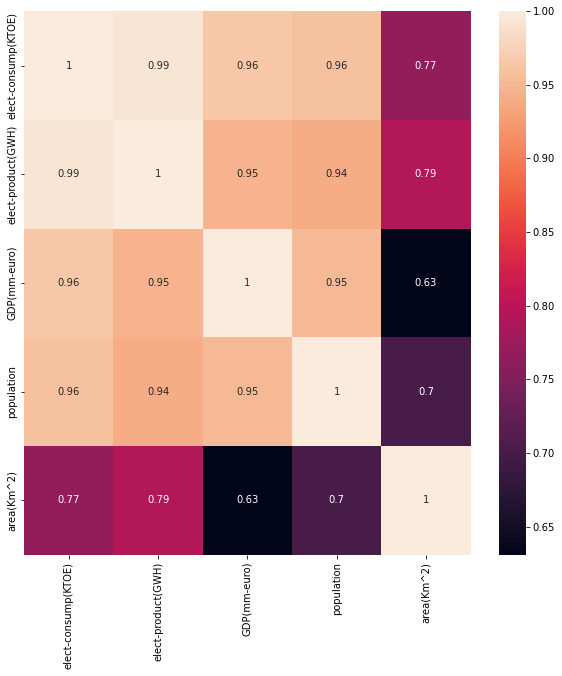

In [170]:
# create correlation matrix heat map
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn 
corr = sns.heatmap(df_final_red.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

### According to this correlation matrix, electricity production and consumption are strongly correlated, and even it can be stated that they have completely the same trend. Therefore, it seems that using electricity production to predict electricity consumption is not a good idea and it can make bias in modelling. Moreover, population and GDP are strongly correlated to electricity production and consumption. Therefore, it may be possible to classify european countries based on their population and economic condition and it will be correlated to classification of electricity consumption. Even country area has a strong correlation with electricity consumption. In general we can say that in european countries the bigger countries have more population and more energy consumption and finally better economic conditions (higher GDP).

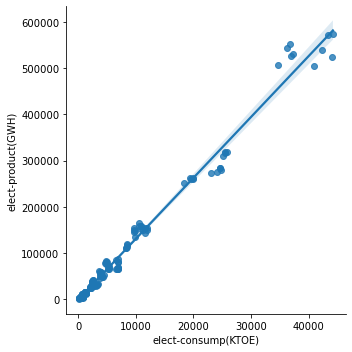

In [172]:
# Create scatterplots between variables
# electricity-consumption vs. electricity production
sns.lmplot(x = 'elect-consump(KTOE)', y = 'elect-product(GWH)', data = df_final_red)

### The relationship is as it was expected. It is a strong linear relationship with low deviations from interpolation line. However, it seems that deviation from the line is more noticeable in higher values of electricity consumption. A very important point that should be noticed here is that these values of production and consumption cannot be directly compared together as they have different units (one is Giga-Watt-Hour and the other is Kilo-Ton-Oil-Equivalent), infact we can just investigate the relationship between their trends. 

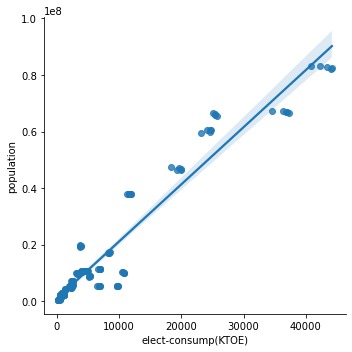

In [173]:
# electricity consumption vs. population
sns.lmplot(x = 'elect-consump(KTOE)', y = 'population', data = df_final_red)

### Relationsip between electricity consumption and population is also a strong linear relation but there are deviation points both in above and bellow the correlation line. Also, it seems that we have countries with same population but higher electricity consumption, this difference may be due to the economic and industrial differences between countries. 

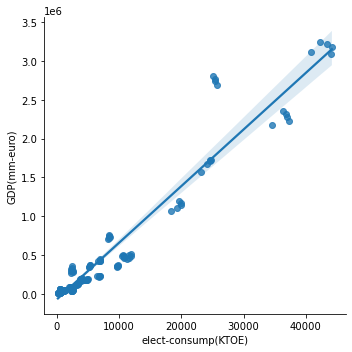

In [174]:
# electricity consumption vs. GDP
sns.lmplot(x = 'elect-consump(KTOE)', y = 'GDP(mm-euro)', data = df_final_red)

### The correlation line reveals a linear connection between electricity consumption and GDP. However, some anomalies with respect to this line are observed for GDP between 2.5 to 3 million euro. These countries seems to have a lower electricity consumption than the expected values. They may be good examples of efficient electricity consumption. 

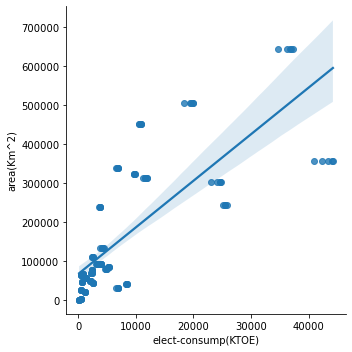

In [175]:
# electricity consumption vs. area
sns.lmplot(x='elect-consump(KTOE)', y='area(Km^2)', data=df_final_red)

### This relationship is less linear than other plots and it seems there are lots of outliers respect to the correlation line. It is true that generally increasing country area can lead to higher electricity consumption but other factors like population and GDP seems to be more effective.

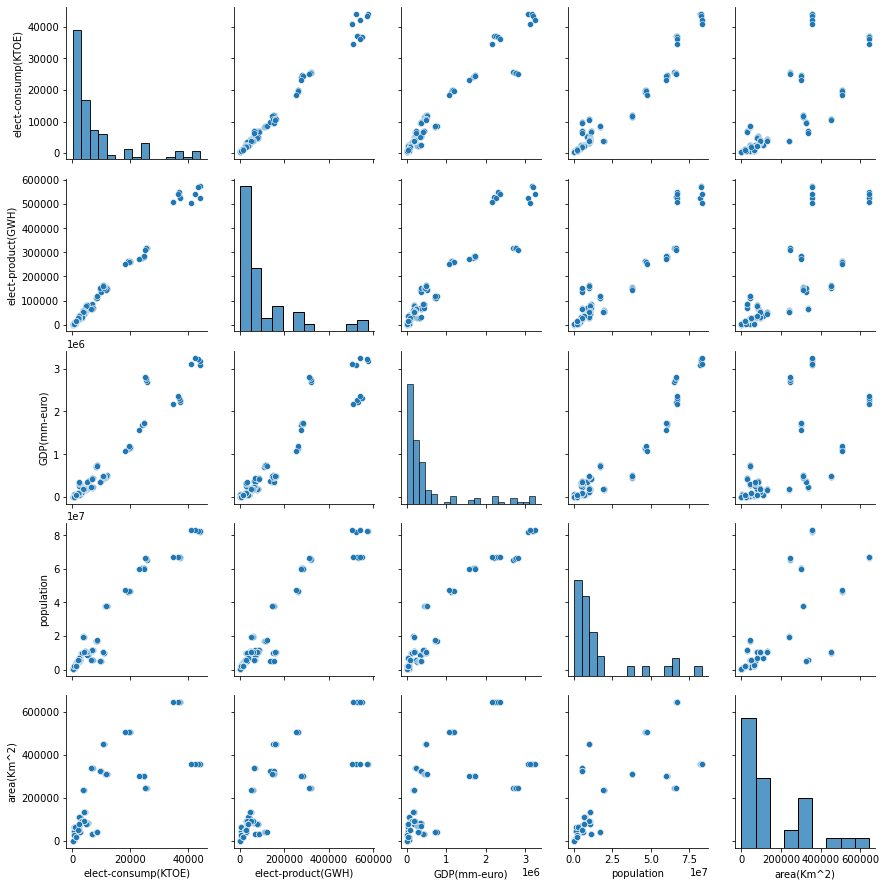

In [176]:
# Pair plot
sns.pairplot(df_final_red)

### The crossplots are as before but the interesting point in this graph is the histogram of variables. When we check the histograms and especially the one for area it's clear that there are distinct groups (3 groups) of countries with respect to country sizes. This division is also detectable in electricity productions and consumptions both in scatterplots and histograms. Therefore for categorical plot we can use the country area as a classification tools. 

<AxesSubplot:xlabel='area(Km^2)', ylabel='Count'>

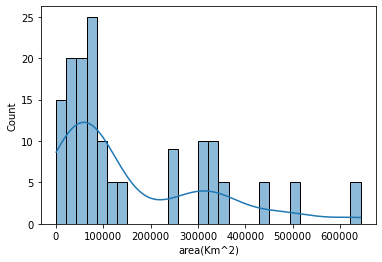

In [200]:
# categorical plot
# first we draw the histogram of country area
sns.histplot(df_final_red['area(Km^2)'], bins=30, kde=True)

In [208]:
# define category for country size
df_final_red.loc[df_final_red['area(Km^2)']<75000, 'country-size'] = 'small'
df_final_red.loc[(df_final_red['area(Km^2)']>=75000) & (df_final_red['area(Km^2)']<300000), 'country-size'] = 'medium'
df_final_red.loc[df_final_red['area(Km^2)']>=300000, 'country-size'] = 'big'

In [209]:
df_final_red['country-size'].value_counts()

small     65
medium    44
big       40
Name: country-size, dtype: int64

<AxesSubplot:xlabel='elect-consump(KTOE)', ylabel='Count'>

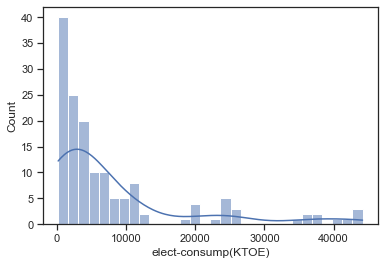

In [210]:
# first we draw the histogram of country area
sns.histplot(df_final_red['elect-consump(KTOE)'], bins=30, kde=True)

In [212]:
# Define category for electricity consumption
df_final_red.loc[df_final_red['elect-consump(KTOE)']<4000, 'consum-class'] = 'low'
df_final_red.loc[(df_final_red['elect-consump(KTOE)']>=4000) & (df_final_red['elect-consump(KTOE)']<10000), 'consum-class'] = 'medium'
df_final_red.loc[df_final_red['elect-consump(KTOE)']>=10000, 'consum-class'] = 'high'

In [213]:
df_final_red['consum-class'].value_counts()

low       79
medium    36
high      34
Name: consum-class, dtype: int64

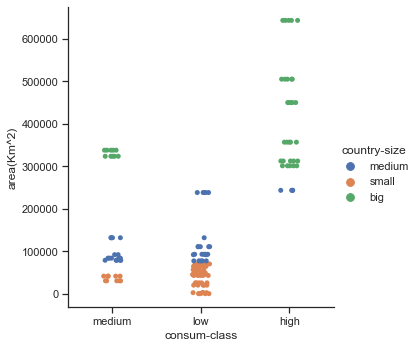

In [215]:
# Create a categorical plot in seaborn using the 'country-size', 'population' & 'elect-consump(KTOE)'
#sns.set(style="ticks")
g = sns.catplot(x="consum-class", y="area(Km^2)", hue="country-size", data=df_final_red)

### Based on this categorical plot we can observe that high consumers are mainly big countries with a few cases of medium countries. On the other hand the low consumption of electricity is observed just in small and some medium countries. There is no big country in low consumer class but there are some in medium consumers which can be considered as efficient electricity consumers. However, this claim needs further investigation like population effect and also GDP. 

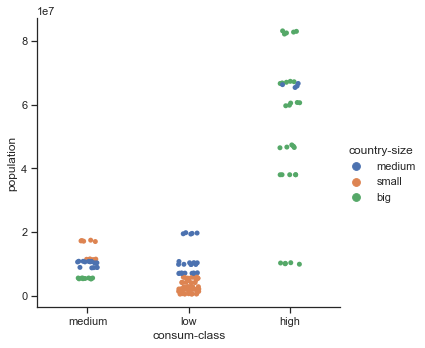

In [216]:
h = sns.catplot(x="consum-class", y="population", hue="country-size", data=df_final_red)

### In this plot the effect of population is also considered. As it can be seen, small countries are mainly low populated and low energy consumers. There are few examples of small countries with medium population and medium energy consumption. Medium size countries except a few cases have medium population and their consumption class is low and medium.There are examples of medium countries that have higher population than other medium countries but with lower electricity consumption. Big countries have generally higher population and are in class of high electricity consumers. To sum up, we can suggest a classification of electricity consumers based on country size and population. But this categorization is not perfect as we can observe some anomalies in general trends. 